<a href="https://colab.research.google.com/github/sorengod/MasterThesis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot
import datetime as dt


In [169]:
df = pd.read_parquet('Spot_Prices.parq')
df.to_excel('Spot_Prices_From_Parquet.xlsx')
df = pd.read_excel('Spot_Prices_From_Parquet.xlsx')
df[['HourDK']] = df[['HourDK']].apply(pd.to_datetime)
#df = df.set_index('HourDK')

In [167]:
df = df.set_index('HourDK')

In [204]:
class Time_Series:

    def __init__ (self, df:pd.DataFrame, DateColumn='HourDK'):
        self.DateColumn = 'HourDK'
        self.df = df

    def extract_date_columns(self):
        #self.df = self.df.set_index(self.DateColumn)
        self.df['Year'] = self.df[self.DateColumn].dt.year
        self.df['Month'] = self.df[self.DateColumn].dt.month
        self.df['Date'] = self.df[self.DateColumn].dt.date
        self.df['Day_Of_Week'] = self.df[self.DateColumn].dt.strftime('%A')

        return self.df.set_index('HourDK')
    
    def plot_prices(self):
      return self.df.plot(y='DK1', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')


In [207]:
from numpy import extract
object = Time_Series(df)
prices = object.extract_date_columns()

In [216]:
DK1_Prices = pd.DataFrame(data=prices, columns = ['DK1'])
DK2_Prices = pd.DataFrame(data=prices, columns = ['DK2'])
NO2_Prices = pd.DataFrame(data=prices, columns = ['NO2'])
SE3_Prices = pd.DataFrame(data=prices, columns = ['SE3'])
SE4_Prices = pd.DataFrame(data=prices, columns = ['SE4'])


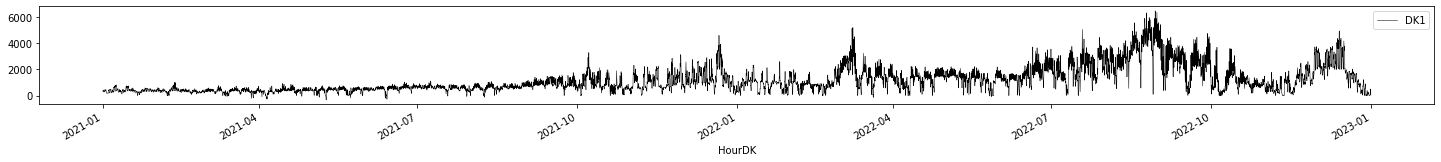

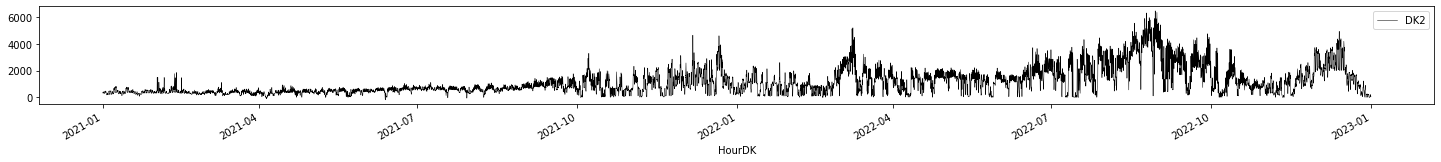

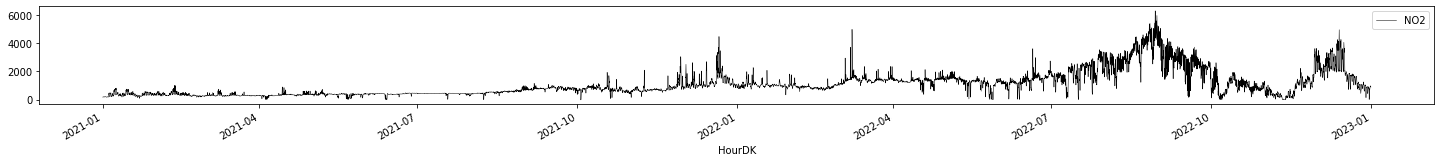

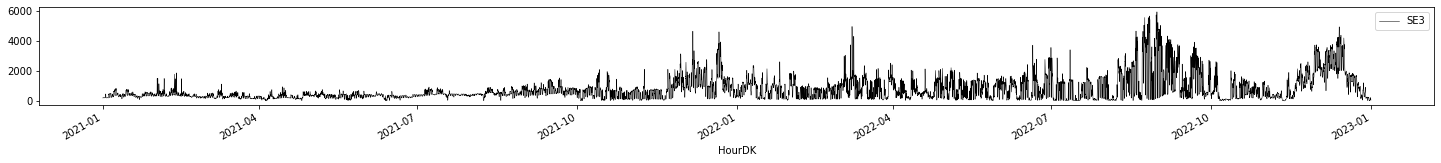

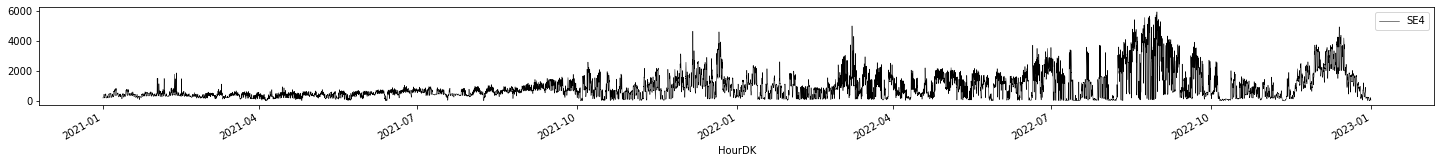

In [217]:
DK1_Prices.plot(y='DK1', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
DK2_Prices.plot(y='DK2', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
NO2_Prices.plot(y='NO2', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
SE3_Prices.plot(y='SE3', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
SE4_Prices.plot(y='SE4', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')


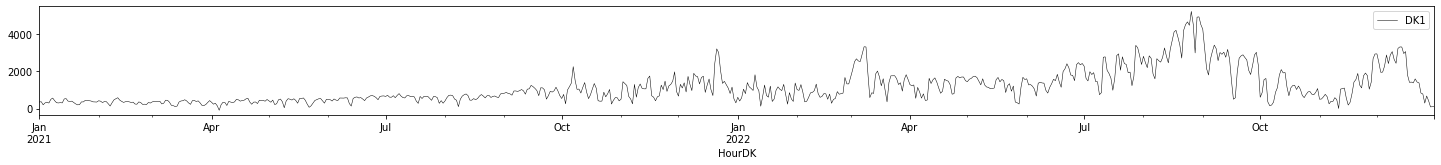

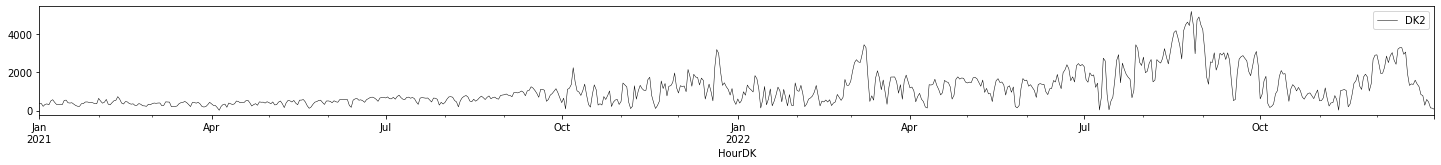

In [223]:
DK1_Prices.resample('1W').mean().plot(y='DK1', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')
DK2_Prices.resample('1W').mean().plot(y='DK2', use_index=True, figsize=(25,2), linewidth='.5', color = 'k')

In [219]:
DK1_Prices

,DK1
HourDK,
2021-01-01 00:00:00,378.519989
2021-01-01 01:00:00,358.579987
2021-01-01 02:00:00,332.459991
2021-01-01 03:00:00,319.369995
2021-01-01 04:00:00,300.540009
...,...
2022-12-31 19:00:00,498.329987
2022-12-31 20:00:00,301.190002
2022-12-31 21:00:00,110.730003
